# Decision Trees

In [9]:
%matplotlib inline

import dtree as d
import matplotlib.pyplot as plt
import monkdata as m
import numpy as np
import random
from pylab import rcParams

from drawtree_qt5 import drawTree
rcParams['figure.figsize'] = 20, 5

## The hardest dataset ?
MONK-2 would be the hardest dataset to build a decision tree for because the underlying attribute relations is hard(est?) to describe in terms of "simple" decisions.

Entropies of each dataset:
* MONK-1: 1.000
* MONK-2: 0.957
* MONK-3: 0.999

## What is entropy ?
In a uniform distribution, each class has an equal probability of appearing in the dataset, so:
    pk = 1/k (where c is number of classes)
So the entropy is equal to:
    E(uniform) = sum_k( -1/k * log_k(1/k) )
    E(uniform) = -log_k(1/k)
    E(uniform) = 1

On the other hand, in a non-uniform distribution, entropy is always lower than 1, and the more random it is, the lowest it is to 1.
Example distributions with high entropy: A fair coin toss.
Example distributions with low entropy: A biased coin toss (25% of getting heads, 75% tails).

## Entropy for attributes

* MONK-1: {A1: 0.07527255560831925, A2: 0.005838429962909286, A3: 0.00470756661729721, A4: 0.02631169650768228, A5: 0.28703074971578435, A6: 0.0007578557158638421} -> A5
* MONK-2: {A1: 0.0037561773775118823, A2: 0.0024584986660830532, A3: 0.0010561477158920196, A4: 0.015664247292643818, A5: 0.01727717693791797, A6: 0.006247622236881467} -> A5
* MONK-3: {A1: 0.007120868396071844, A2: 0.29373617350838865, A3: 0.0008311140445336207, A4: 0.002891817288654397, A5: 0.25591172461972755, A6: 0.007077026074097326} -> A2 and A5

A2 and A5 are strong contenders, but A5 seems the most convincing for all example datasets.

## Information gain

When the information gain is maximised, some of the subsets now have a null entropy which means we can completely determine them based on their attribute.
This is a useful heuristic because it allows us to reduce the entropy, i.e make the subsets more deterministic and less "random" when a certain attribute is picked out.

The ones with the most information gains for each subset, i.e:
* 0: -, 1: A4, 2: A6, 3: A1

Results:
* MONK-1: {Etrain: 1.0, Etest: 0.82}
* MONK-2: {Etrain: 1.0, Etest: 0.69}
* MONK-3: {Etrain: 1.0, Etest: 0.94}

The one with highest entropy is hard to train (2nd lowest score).

In [7]:
def partition(data, fraction):
    ldata = list(data)
    random.shuffle(ldata)
    breakPoint = int(len(ldata) * fraction)
    return ldata[:breakPoint], ldata[breakPoint:]

def pruneTree(tree, pruning_set):
    pruned = d.allPruned(tree)
    max_score = 0
    for prune in pruned:
        score = d.check(prune, pruning_set)
        if score >= max_score:
            max_score = score
            max_pruned = prune
    return max_pruned, max_score

def getClassError(fraction, data, runs=500):
    train, val = partition(data, fraction)
    t = d.buildTree(train, m.attributes)
    max_score = d.check(t, val)
    scores = []
    for _ in range(runs):
        train, val = partition(data, fraction)
        score = d.check(t, val)
        p, s = pruneTree(t, val)
        scores.append(s)
    avg, spread = np.mean(scores), np.std(scores)
    return avg, spread

## Getting data

In [11]:
fractions = [f/10.0 for f in range(3, 9)]
means1, spreads1 = zip(*[getClassError(f, m.monk1) for f in fractions])
means3, spreads3 = zip(*[getClassError(f, m.monk3) for f in fractions])

## Plotting

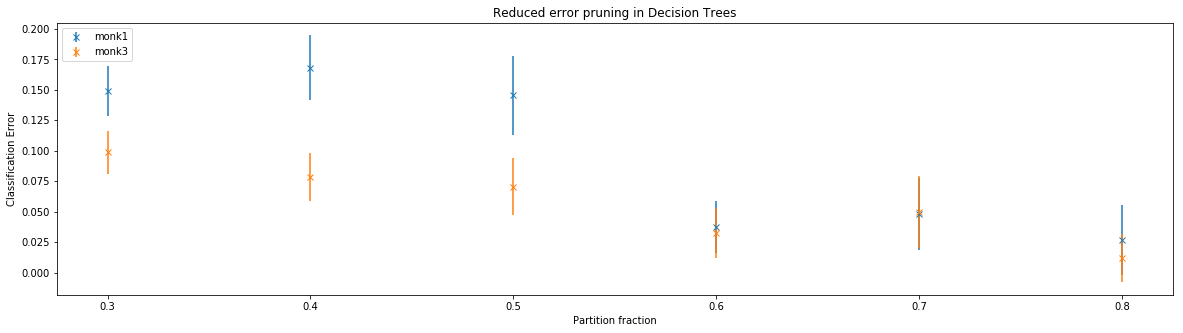

In [12]:
# settings linespaces
x = np.array(fractions)
y1 = 1 - np.array(means1)
e1 = np.array(spreads1)
y3 = 1 - np.array(means3)
e3 = np.array(spreads3)
# plt.show()
e1 = plt.errorbar(x, y1, e1, linestyle='None', marker='x', label='monk1')
e2 = plt.errorbar(x, y3, e3, linestyle='None', marker='x', label='monk3')
tt = plt.title('Reduced error pruning in Decision Trees')
ll = plt.legend(loc='upper left')
xl = plt.xlabel('Partition fraction')
yl = plt.ylabel('Classification Error')
plt.show()

## Pruning decision trees
Pruning is very useful to limit the complexity of the model, because following Occahm's razor, the model should the simplest possible.
So while by pruning our decision tree, we can make our bias bigger (the model performs average in most datasets), it has the advantage of highly reducing the variance by limiting the complexity of the decision tree.

## Conclusion
The test error is reduced with pruning.